In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas_datareader
import datetime


In [3]:
import pandas_datareader.data as web

In [4]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)

In [21]:
tesla = pd.read_csv('Tesla_Stock.csv')

In [22]:
ford = pd.read_csv('Ford_Stock.csv')

In [23]:
gm = pd.read_csv('GM_Stock.csv')

In [27]:
gm.set_index('Date', inplace = True)
tesla.set_index('Date', inplace = True)
ford.set_index('Date', inplace = True)

In [28]:
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


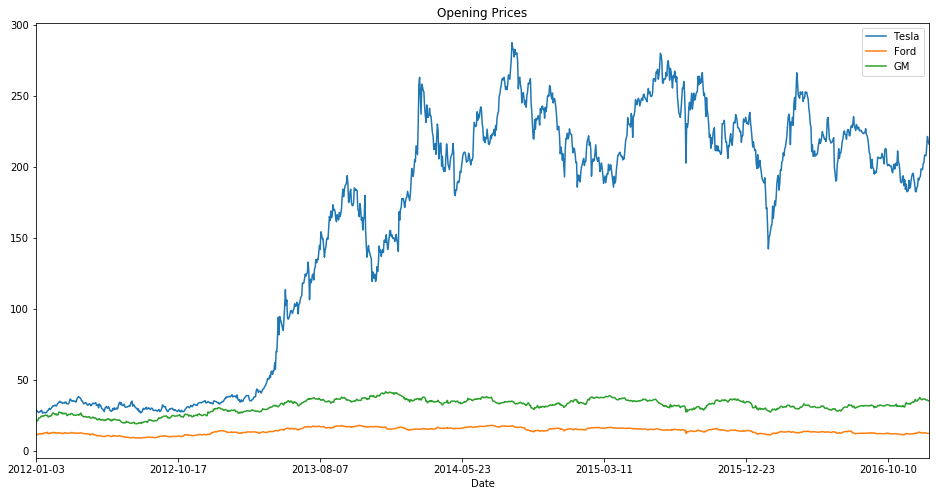

In [29]:
tesla['Open'].plot(label = 'Tesla', figsize = (16,8), title = 'Opening Prices')
ford['Open'].plot(label = 'Ford')
gm['Open'].plot(label = 'GM')
plt.legend();

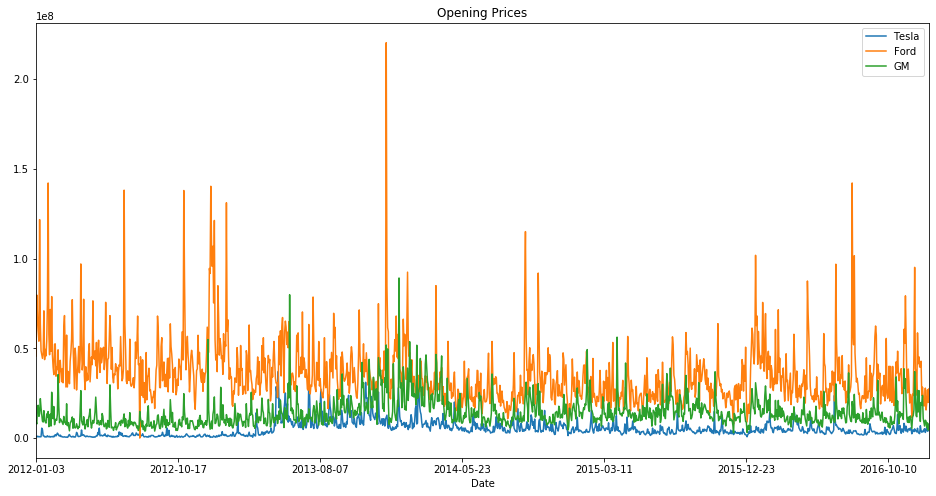

In [30]:
tesla['Volume'].plot(label = 'Tesla', figsize = (16,8), title = 'Opening Prices')
ford['Volume'].plot(label = 'Ford')
gm['Volume'].plot(label = 'GM')
plt.legend();

In [38]:
ford['Volume'].idxmax()

'2013-12-18'

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

In [32]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']

In [33]:
gm['Total Traded'] = gm['Open']*gm['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']

In [34]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00


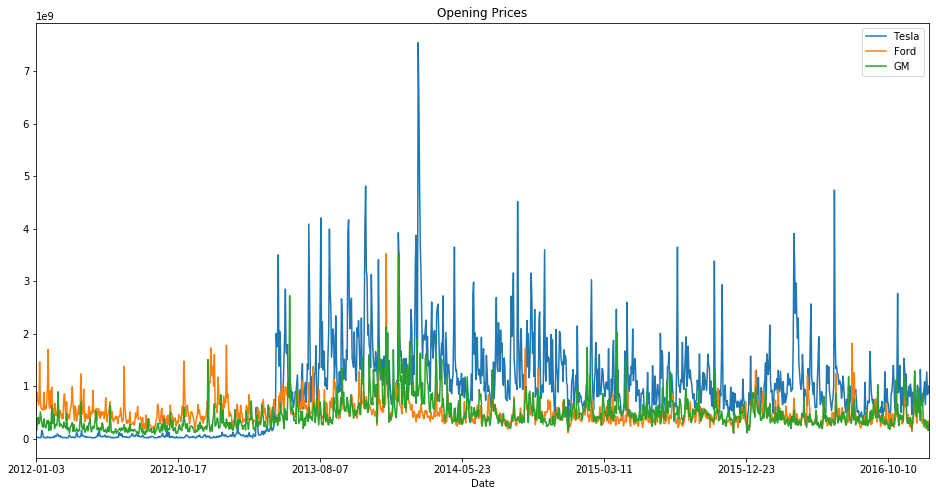

In [35]:
tesla['Total Traded'].plot(label = 'Tesla', figsize = (16,8), title = 'Opening Prices')
ford['Total Traded'].plot(label = 'Ford')
gm['Total Traded'].plot(label = 'GM')
plt.legend();

In [37]:
tesla['Total Traded'].idxmax()

'2014-02-25'

In [39]:
gm['MA50'] = gm['Open'].rolling(50).mean()

In [40]:
gm['MA200'] = gm['Open'].rolling(200).mean()

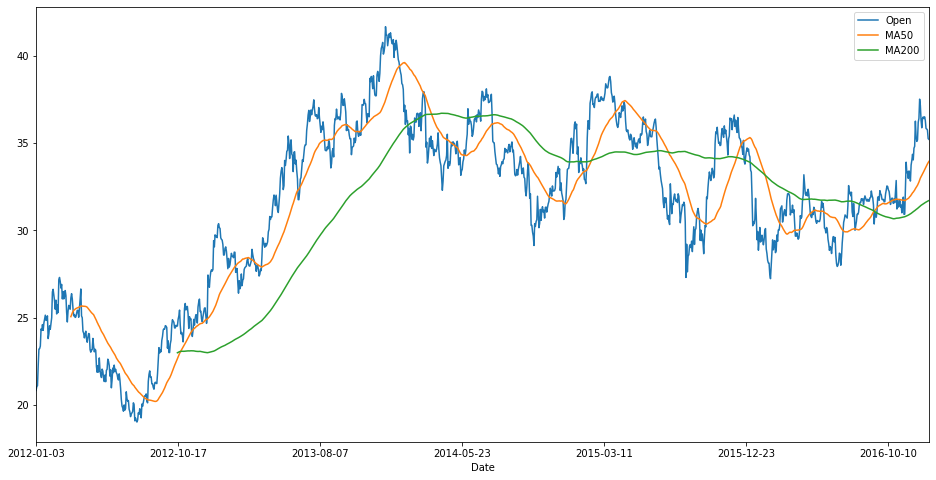

In [42]:
gm[['Open', 'MA50', 'MA200']].plot(figsize = (16,8));

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. You may need to rearrange the columns into a new single dataframe. Hints and info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

In [43]:
from pandas.plotting import scatter_matrix

In [44]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [46]:
car_comp.columns = ['Tesla Open' , 'GM Open', 'Ford Open']

In [47]:
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,28.94,20.83,11.00
2012-01-04,28.21,21.05,11.15
2012-01-05,27.76,21.10,11.33
2012-01-06,27.20,22.26,11.74
2012-01-09,27.00,23.20,11.83


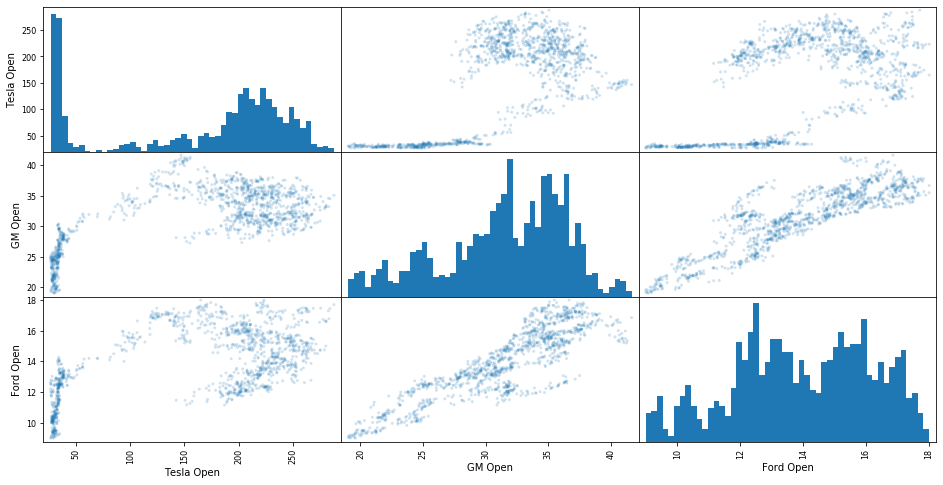

In [51]:
scatter_matrix(car_comp, figsize = (16,8) , alpha = 0.2, hist_kwds= {'bins' : 50});

In [57]:
import mpl_finance

In [62]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY

In [65]:
ford.head()

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08


In [71]:
ford_reset = ford.loc['2012-01-01':'2012-01-31'].reset_index()

In [72]:
ford_reset

,Date,Open,High,Low,Close,Volume,Total Traded
0,2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08
1,2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08
2,2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08
3,2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08
4,2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08
5,2012-01-10,12.00,12.05,11.63,11.80,121750545,1.461007e+09
6,2012-01-11,11.74,12.18,11.65,12.07,63806007,7.490825e+08
7,2012-01-12,12.16,12.18,11.89,12.14,48687666,5.920420e+08
8,2012-01-13,12.01,12.08,11.84,12.04,46388677,5.571280e+08
9,2012-01-17,12.20,12.26,11.96,12.02,44398472,5.416614e+08


In [82]:
from datetime import datetime 

In [84]:
datetime.strptime(ford_reset['Date'][0], '%Y-%m-%d')


datetime.datetime(2012, 1, 3, 0, 0)

In [88]:
ford_reset['Date'] = ford_reset['Date'].apply(lambda date: datetime.strptime(date,"%Y-%m-%d"))

In [89]:
ford_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
Date            20 non-null datetime64[ns]
Open            20 non-null float64
High            20 non-null float64
Low             20 non-null float64
Close           20 non-null float64
Volume          20 non-null int64
Total Traded    20 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.2 KB


In [90]:
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))


In [91]:
ford_reset.head()

,Date,Open,High,Low,Close,Volume,Total Traded,date_ax
0,2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,734505.0
1,2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,734506.0
2,2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,734507.0
3,2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,734508.0
4,2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,734511.0


In [93]:
list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']

ford_values = [tuple(vals) for vals in ford_reset[list_of_cols].values]

In [94]:
ford_values

[(734505.0, 11.0, 11.25, 10.99, 11.13),
 (734506.0, 11.15, 11.53, 11.07, 11.3),
 (734507.0, 11.33, 11.63, 11.24, 11.59),
 (734508.0, 11.74, 11.8, 11.52, 11.71),
 (734511.0, 11.83, 11.95, 11.7, 11.8),
 (734512.0, 12.0, 12.05, 11.63, 11.8),
 (734513.0, 11.74, 12.18, 11.65, 12.07),
 (734514.0, 12.16, 12.18, 11.89, 12.14),
 (734515.0, 12.01, 12.08, 11.84, 12.04),
 (734519.0, 12.2, 12.26, 11.96, 12.02),
 (734520.0, 12.03, 12.37, 12.0, 12.34),
 (734521.0, 12.48, 12.72, 12.43, 12.61),
 (734522.0, 12.55, 12.64, 12.45, 12.59),
 (734525.0, 12.69, 12.84, 12.55, 12.66),
 (734526.0, 12.56, 12.86, 12.46, 12.82),
 (734527.0, 12.8, 12.98, 12.7, 12.93),
 (734528.0, 13.03, 13.05, 12.66, 12.79),
 (734529.0, 11.96, 12.53, 11.79, 12.21),
 (734532.0, 12.06, 12.44, 12.0, 12.29),
 (734533.0, 12.47, 12.51, 12.2, 12.42)]

In [95]:
mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')  

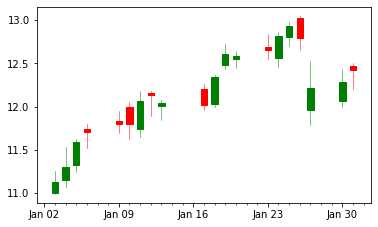

In [96]:
#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, ford_values, width=0.6, colorup='g',colordown='r');

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

In [98]:
tesla['returns'] = (tesla['Close']/tesla['Close'].shift(1)) - 1

In [99]:
tesla['returns']  = tesla['Close'].pct_change(1)

In [101]:
ford['returns']  = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [102]:
ford.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,0.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,0.025664
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,0.010354
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,0.007686


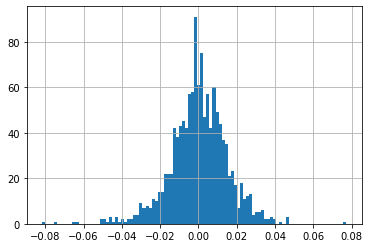

In [103]:
ford['returns'].hist(bins = 100);

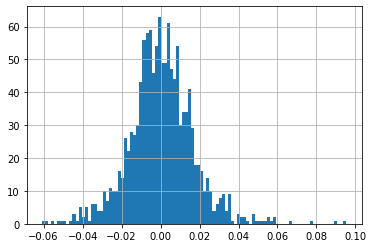

In [104]:
gm['returns'].hist(bins = 100);

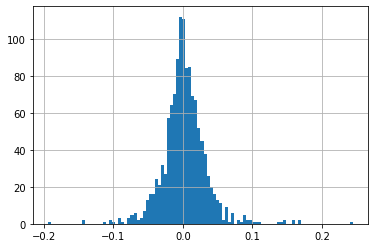

In [105]:
tesla['returns'].hist(bins = 100);

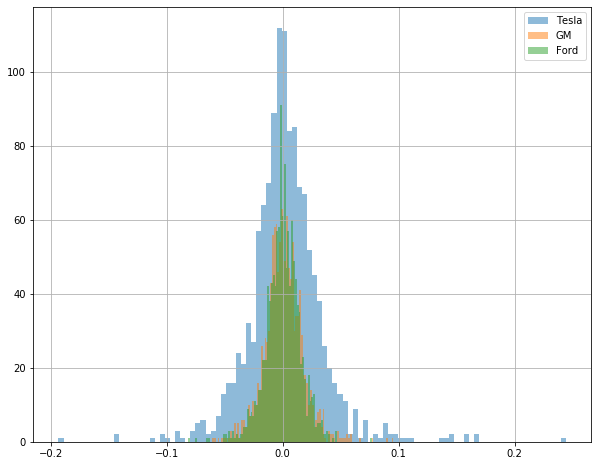

In [106]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

Kernel Density Estimation plots

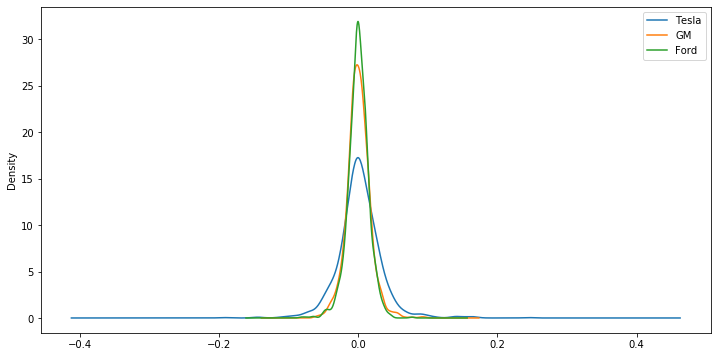

In [107]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

Box Plots for comparing the returns

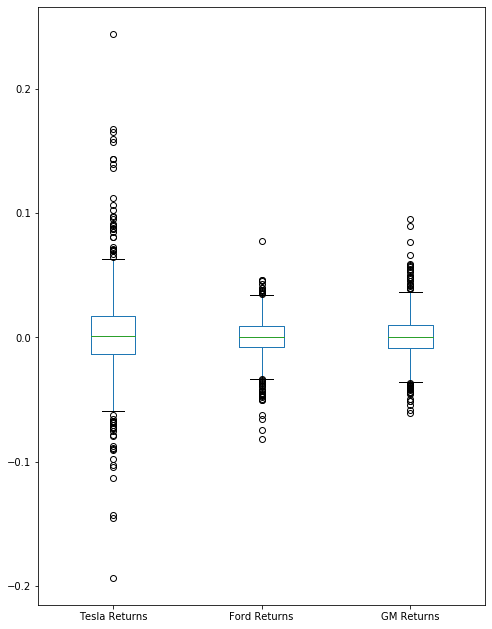

In [110]:
box_df = pd.concat([tesla['returns'], ford['returns'] , gm['returns']], axis = 1)
box_df.columns = ['Tesla Returns', 'Ford Returns', 'GM Returns']
box_df.plot(kind = 'box', figsize = (8,11));

## Comparing Daily Returns between Stocks

**Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are.**

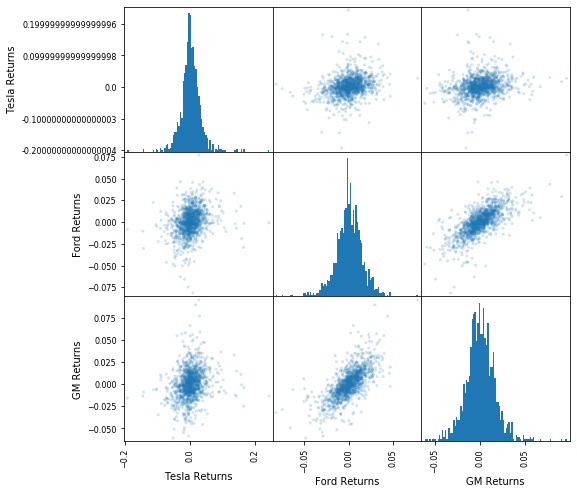

In [112]:
scatter_matrix(box_df, figsize = (8,8),alpha = 0.2, hist_kwds = {'bins': 100});

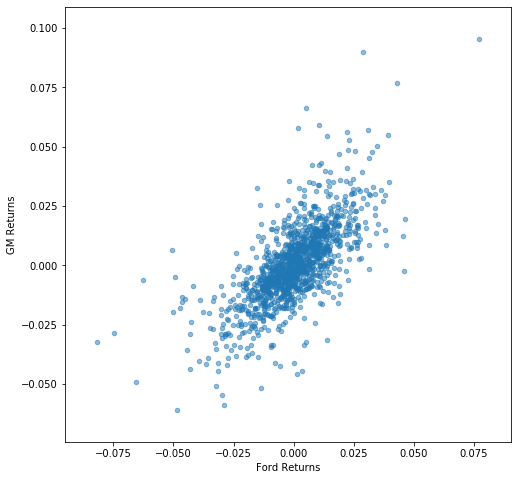

In [115]:
box_df.plot(kind = 'scatter', x = 'Ford Returns', y = 'GM Returns' , alpha = 0.5, figsize = (8,8));

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

In [117]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [118]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,0.970442


In [119]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

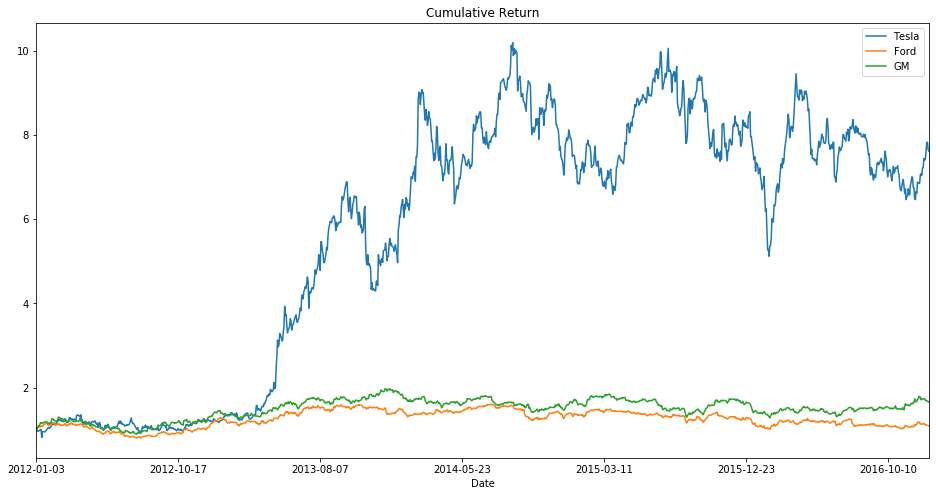

In [121]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend();